In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime,date,time

In [63]:
df = pd.read_csv("Airlines_data.csv")
df.head(12)

,Month,passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
5,1949-06,135
6,1949-07,148
7,1949-08,148
8,1949-09,136
9,1949-10,119


In [64]:
df['Month'] = pd.to_datetime(df['Month'])

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Month        144 non-null    datetime64[ns]
 1    passengers  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


In [66]:
df.set_index('Month',inplace=True)

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0    passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


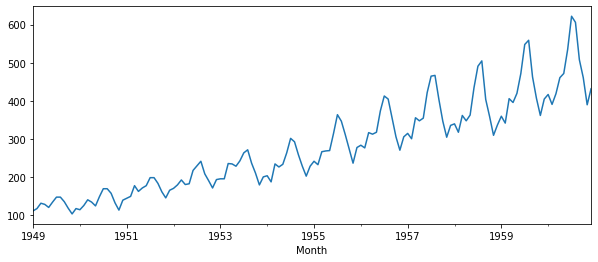

In [68]:
plt.figure(figsize=(10,4))
df[' passengers'].plot()

In [69]:
# Step 1: Determing the rolling Statistics

rolmean = df.rolling(window=12).mean()
rolstd = df.rolling(window=12).std()

print(rolmean)
print(rolstd)

             passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
...                 ...
1960-08-01   463.333333
1960-09-01   467.083333
1960-10-01   471.583333
1960-11-01   473.916667
1960-12-01   476.166667

[144 rows x 1 columns]
             passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
...                 ...
1960-08-01    83.630500
1960-09-01    84.617276
1960-10-01    82.541954
1960-11-01    79.502382
1960-12-01    77.737125

[144 rows x 1 columns]


In [70]:
rolmean.head(12)

,passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
1949-06-01,NaN
1949-07-01,NaN
1949-08-01,NaN
1949-09-01,NaN


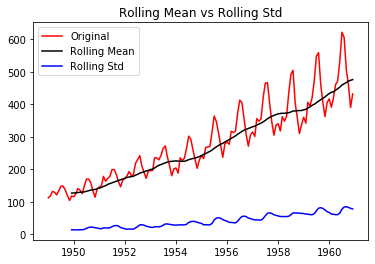

In [71]:
# PLot Rolling Statistics

Orig = plt.plot(df, color='red', label='Original')
Mean = plt.plot(rolmean, color='black', label='Rolling Mean')
Std = plt.plot(rolstd, color='blue', label='Rolling Std')
plt.title('Rolling Mean vs Rolling Std')
plt.legend()
plt.show()

In [72]:
#Step 2: Perform Dicky fuller test
 
from statsmodels.tsa.stattools import adfuller     

In [73]:
df_test = adfuller(x=df[' passengers'],    autolag='AIC')
df_test

(0.8153688792060423,
 0.9918802434376409,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.6929308390189)

In [74]:
df_output = pd.Series(df_test[0:4], index=['Test Statistics','p_values','Lags used','No. of observation used'])
df_output

Test Statistics              0.815369
p_values                     0.991880
Lags used                   13.000000
No. of observation used    130.000000
dtype: float64

In [75]:
for key, value in df_test[4].items():
    df_output['Critical value (%s)' %key] =  value
    
print(df_output)    

Test Statistics              0.815369
p_values                     0.991880
Lags used                   13.000000
No. of observation used    130.000000
Critical value (1%)         -3.481682
Critical value (5%)         -2.884042
Critical value (10%)        -2.578770
dtype: float64


In [76]:
# Step 3: Estimating Trend

df_log = np.log(df)
print(df_log)

             passengers
Month                  
1949-01-01     4.718499
1949-02-01     4.770685
1949-03-01     4.882802
1949-04-01     4.859812
1949-05-01     4.795791
...                 ...
1960-08-01     6.406880
1960-09-01     6.230481
1960-10-01     6.133398
1960-11-01     5.966147
1960-12-01     6.068426

[144 rows x 1 columns]


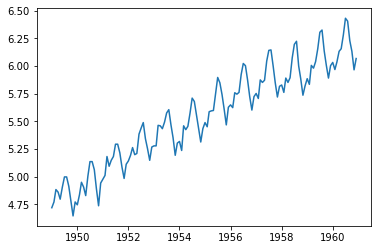

In [77]:
plt.plot(df_log)

In [78]:
# Step 4: Find the moving average with the log values

rolmean_logscale = df_log.rolling(window=12).mean()
rolstd_logscale = df_log.rolling(window=12).std()
print(rolmean_logscale, rolstd_logscale)

             passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
...                 ...
1960-08-01     6.124517
1960-09-01     6.132246
1960-10-01     6.142628
1960-11-01     6.148837
1960-12-01     6.154215

[144 rows x 1 columns]              passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
...                 ...
1960-08-01     0.171453
1960-09-01     0.174172
1960-10-01     0.169804
1960-11-01     0.160923
1960-12-01     0.156660

[144 rows x 1 columns]


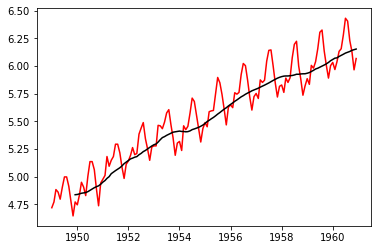

In [79]:
plt.plot(df_log, color='red')
plt.plot(rolmean_logscale,color='black')

In [80]:
log_mov_diff = df_log - rolmean_logscale
print(log_mov_diff)

             passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
...                 ...
1960-08-01     0.282363
1960-09-01     0.098235
1960-10-01    -0.009230
1960-11-01    -0.182690
1960-12-01    -0.085789

[144 rows x 1 columns]


In [81]:
# remove nan values

log_mov_diff.dropna(inplace=True)
log_mov_diff.head(12)

,passengers
Month,
1949-12-01,-0.065494
1950-01-01,-0.093449
1950-02-01,-0.007566
1950-03-01,0.099416
1950-04-01,0.052142
1950-05-01,-0.027529
1950-06-01,0.139881
1950-07-01,0.260184
1950-08-01,0.248635


In [82]:
def test_stationarity(timeseries):
    
    MovingAverage = timeseries.rolling(window=12).mean()
    MovingStd = timeseries.rolling(window=12).std()
    
    #Plot rolling statstics
    plt.figure(figsize=(12,8))
    Orig = plt.plot(timeseries, color='red', label='Original')
    Mean = plt.plot(MovingAverage, color='black', label='Rolling Mean')
    Std = plt.plot(MovingStd, color='blue', label='Rolling Std')
    plt.title('Rolling Meam vs Rolling Std')
    plt.legend()
    plt.show()
   
    #Perform Dickey-fuller test :
    print('Dickey-Fuller test results:')
    df_test = adfuller(timeseries[' passengers'], autolag = 'AIC')
    df_output = pd.Series(df_test[0:4], index=['Test statistics','p-value','Lags used','No. of observation used'])
    for key,value in df_test[4].items():
        df_output['Critical value (%s)'%key] = value
    print(df_output)    

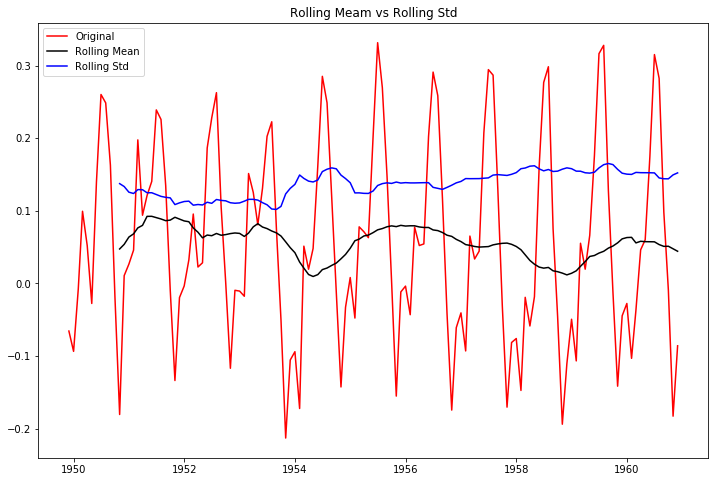

Dickey-Fuller test results:
Test statistics             -3.162908
p-value                      0.022235
Lags used                   13.000000
No. of observation used    119.000000
Critical value (1%)         -3.486535
Critical value (5%)         -2.886151
Critical value (10%)        -2.579896
dtype: float64


In [83]:
test_stationarity(log_mov_diff)

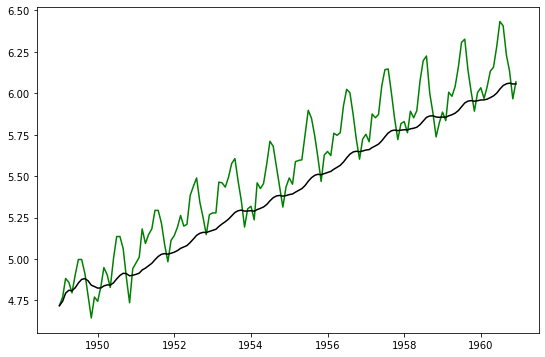

In [84]:
expo_avg = df_log.ewm(halflife=12).mean()
plt.figure(figsize=(9,6))
plt.plot(df_log, color = 'green')
plt.plot(expo_avg, color = 'black')

In [85]:
df_log_minus_expo_avg = df_log - expo_avg
print(df_log_minus_expo_avg)

             passengers
Month                  
1949-01-01     0.000000
1949-02-01     0.025339
1949-03-01     0.088967
1949-04-01     0.048028
1949-05-01    -0.012415
...                 ...
1960-08-01     0.360435
1960-09-01     0.173704
1960-10-01     0.072319
1960-11-01    -0.089603
1960-12-01     0.011964

[144 rows x 1 columns]


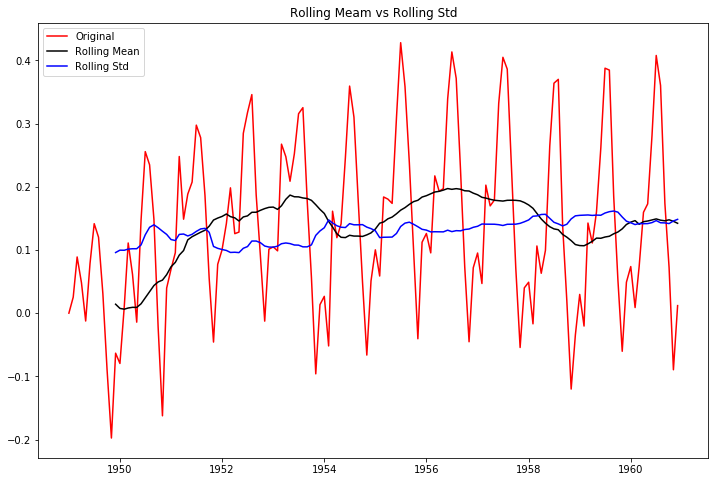

Dickey-Fuller test results:
Test statistics             -3.601262
p-value                      0.005737
Lags used                   13.000000
No. of observation used    130.000000
Critical value (1%)         -3.481682
Critical value (5%)         -2.884042
Critical value (10%)        -2.578770
dtype: float64


In [86]:
test_stationarity(df_log_minus_expo_avg)

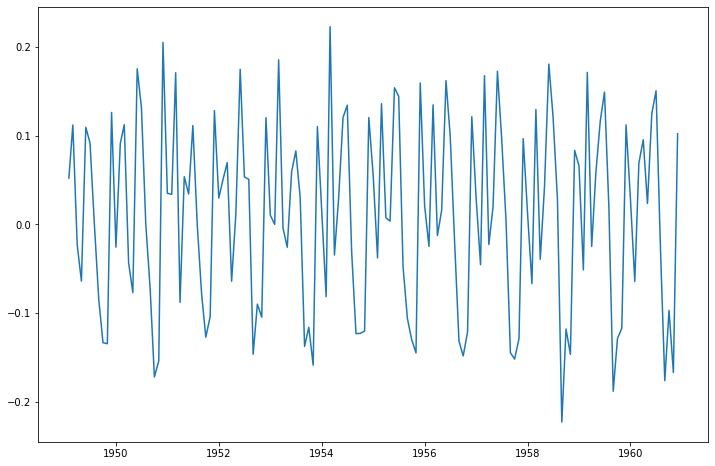

In [87]:
data_log_shifting = df_log - df_log.shift()
plt.figure(figsize=(12,8))
plt.plot(data_log_shifting)

In [88]:
data_log_shifting.dropna(inplace = True)

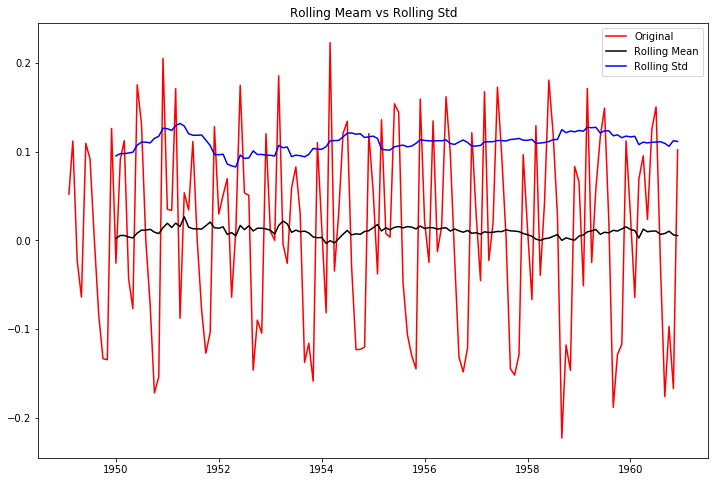

Dickey-Fuller test results:
Test statistics             -2.717131
p-value                      0.071121
Lags used                   14.000000
No. of observation used    128.000000
Critical value (1%)         -3.482501
Critical value (5%)         -2.884398
Critical value (10%)        -2.578960
dtype: float64


In [89]:
test_stationarity(data_log_shifting)

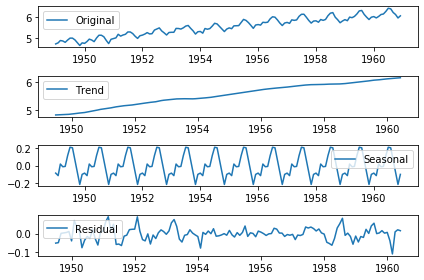

In [90]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomp = seasonal_decompose(df_log)

trend = decomp.trend
seasonal = decomp.seasonal
residual = decomp.resid

plt.subplot(411)
plt.plot(df_log, label='Original')
plt.legend()
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend()
plt.subplot(413)
plt.plot(seasonal, label='Seasonal')
plt.legend()
plt.subplot(414)
plt.plot(residual,label='Residual')
plt.legend()
plt.tight_layout()
plt.show()

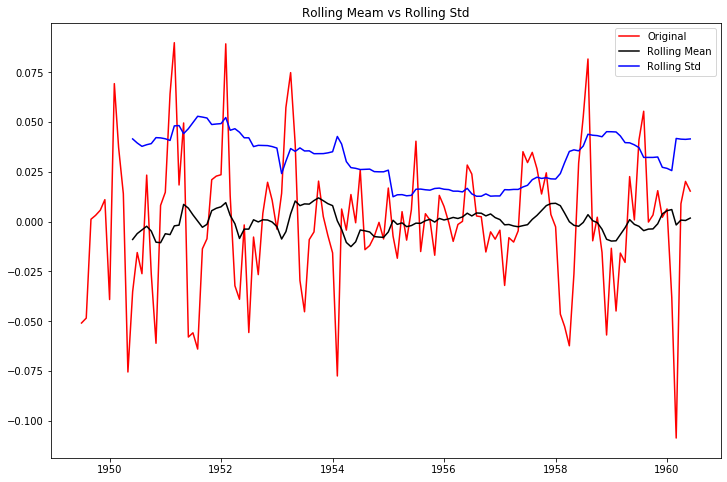

Dickey-Fuller test results:


KeyError: ' passengers'

In [91]:
decomp_residual = residual
#decomp_residual.dropna(inplace=True)
test_stationarity(decomp_residual)

In [95]:
# ACF and PACF plot

from statsmodels.tsa.stattools import acf,pacf

C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning


Text(0.5, 1.0, 'Partial Autocorrelation Function')

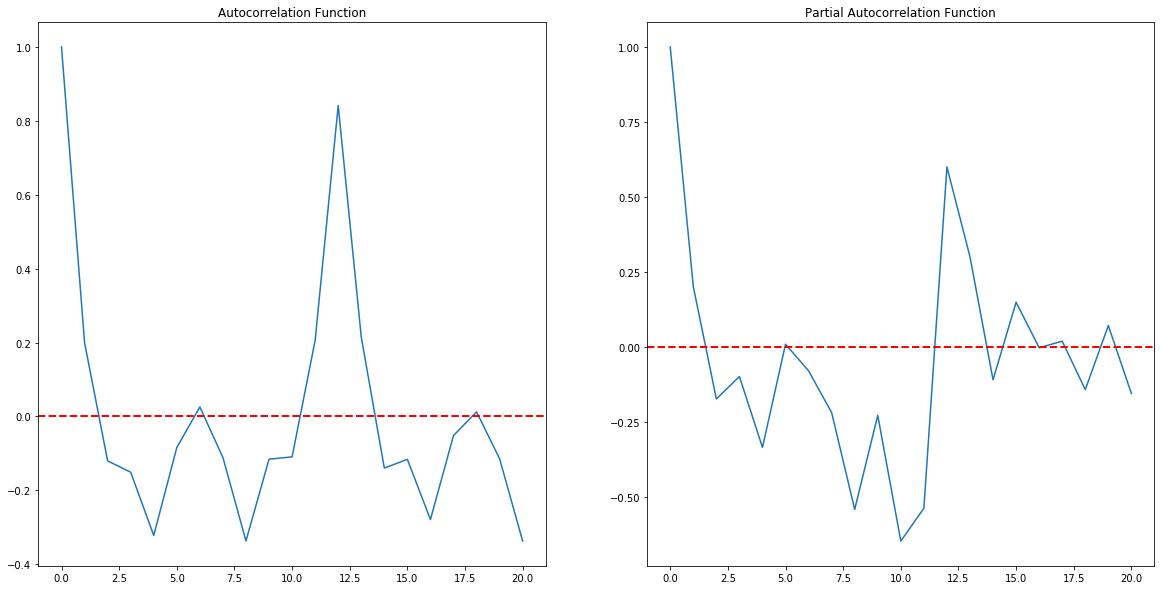

In [100]:
lag_acf = acf(data_log_shifting,nlags=20)
lag_pacf = pacf(data_log_shifting,nlags=20,method = 'ols')

#Plot ACF
plt.figure(figsize=(20,10))
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linewidth=2, color='r', linestyle='--')
plt.title('Autocorrelation Function')

#Plot PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linewidth=2, color='r', linestyle='--')
plt.title('Partial Autocorrelation Function')

In [101]:
#ARIMA Model

from statsmodels.tsa.arima_model import ARIMA

C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Plotting AR model


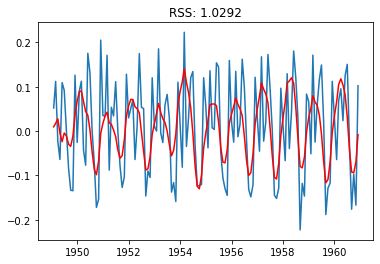

In [102]:
AR = ARIMA(df_log,order = (2,1,2))
result_AR = AR.fit(disp=-1)
plt.plot(data_log_shifting)
plt.plot(result_AR.fittedvalues, color='red')
plt.title('RSS: %.4f' % sum((result_AR.fittedvalues - data_log_shifting[' passengers'])**2))
print('Plotting AR model')

C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Plotting MA Model


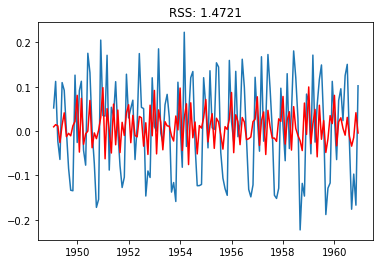

In [104]:
MA = ARIMA(df_log, order = (0,1,2))
result_MA = MA.fit(disp=-1)
plt.plot(data_log_shifting)
plt.plot(result_MA.fittedvalues, color='red')
plt.title('RSS: %.4f' % sum((result_MA.fittedvalues - data_log_shifting[' passengers'])**2))
print('Plotting MA Model')

In [105]:
print(result_AR.fittedvalues)

Month
1949-02-01    0.009580
1949-03-01    0.017491
1949-04-01    0.027670
1949-05-01   -0.004521
1949-06-01   -0.023890
                ...   
1960-08-01   -0.041176
1960-09-01   -0.092350
1960-10-01   -0.094013
1960-11-01   -0.069924
1960-12-01   -0.008127
Length: 143, dtype: float64


In [107]:
predict_AR = pd.Series(result_AR.fittedvalues, copy=True)
print(predict_AR)

Month
1949-02-01    0.009580
1949-03-01    0.017491
1949-04-01    0.027670
1949-05-01   -0.004521
1949-06-01   -0.023890
                ...   
1960-08-01   -0.041176
1960-09-01   -0.092350
1960-10-01   -0.094013
1960-11-01   -0.069924
1960-12-01   -0.008127
Length: 143, dtype: float64


In [108]:
predict_AR_cumsum = predict_AR.cumsum()
print(predict_AR_cumsum)

Month
1949-02-01    0.009580
1949-03-01    0.027071
1949-04-01    0.054742
1949-05-01    0.050221
1949-06-01    0.026331
                ...   
1960-08-01    1.372554
1960-09-01    1.280204
1960-10-01    1.186191
1960-11-01    1.116267
1960-12-01    1.108140
Length: 143, dtype: float64


In [109]:
predict_AR_log = pd.Series(df_log[' passengers'].iloc[0], index = df_log.index)
predict_AR_log = predict_AR_log.add(predict_AR_cumsum,fill_value=0)
predict_AR_log.head()

Month
1949-01-01    4.718499
1949-02-01    4.728079
1949-03-01    4.745570
1949-04-01    4.773241
1949-05-01    4.768720
dtype: float64

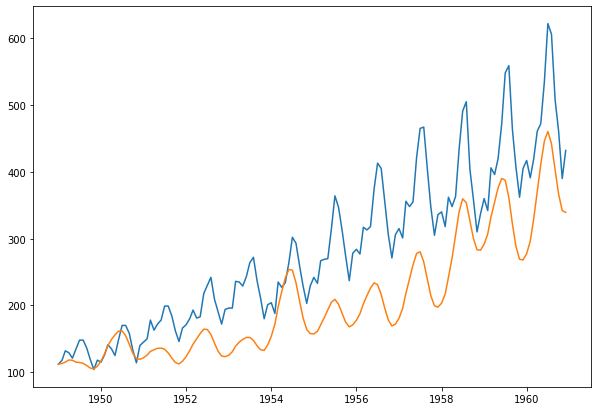

In [110]:
predict_AR = np.exp(predict_AR_log)
plt.figure(figsize=(10,7))
plt.plot(df)
plt.plot(predict_AR)

In [111]:
df_log

,passengers
Month,
1949-01-01,4.718499
1949-02-01,4.770685
1949-03-01,4.882802
1949-04-01,4.859812
1949-05-01,4.795791
...,...
1960-08-01,6.406880
1960-09-01,6.230481
1960-10-01,6.133398


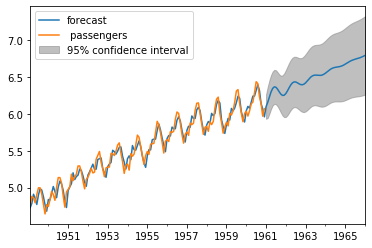

<Figure size 720x720 with 0 Axes>

In [112]:
result_AR.plot_predict(1,204)
plt.figure(figsize=(10,10))
X = result_AR.forecast(60)